In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
!pip install simplejson
!pip install pyyaml h5py

     |████████████████████████████████| 130 kB 7.2 MB/s 


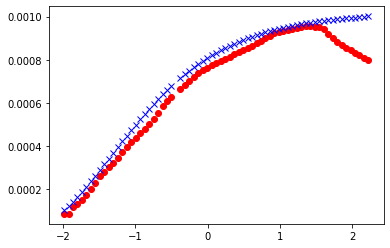

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
## Everything else is fixed other than omega is changing
import keras.losses
def my_loss_fn(y_true, y_pred):
    y_true_0 = y_true[0]
    y_pred_0 = y_pred[0]
    print('y_true_0 is: ' + str(y_true_0))
    print('y_pred_0 is: ' + str(y_pred_0))
    y_true_rest = y_true[1:]
    y_pred_rest = y_pred[1:]
    # mseloss = np.mean(np.abs(y_true_rest - y_pred_rest), axis=-1)
    maeloss = keras.metrics.mean_absolute_error(y_true_rest, y_pred_rest)
    zero_loss = keras.losses.mean_absolute_error(y_true_0,y_pred_0)
    return maeloss + zero_loss  # Note the `axis=-1`
keras.losses.my_loss_fn = my_loss_fn
N = 12 # output column
mu = 1 #viscosity


# model = load_model('/content/drive/MyDrive/inversepaper/resultsci06/newlrrate/init2_newloss_adamno0_select1w_5layer_mae/model_init2_newloss_adamno0_select1w_5layer_mae')
# df =  pd.read_csv("/content/drive/MyDrive/inversepaper/resultsci03/newloss_adamno0_select1w_5layer_mae/testingset.csv")

# model = load_model('/content/drive/MyDrive/inversepaper/resultsci06/newlrrate/lr1_init_newloss_adamno0_select1w_5layer_mae/model_lr1_init_newloss_adamno0_select1w_5layer_mae')
# df =  pd.read_csv("/content/drive/MyDrive/inversepaper/resultsci03/newloss_adamno0_select1w_5layer_mape/testingset.csv")

# model = load_model('/content/drive/MyDrive/inversepaper/resultsci06/newlrrate/lr2_init_newloss_adamno0_select1w_5layer_mae/model_lr2_init_newloss_adamno0_select1w_5layer_mae')
# df =  pd.read_csv("/content/drive/MyDrive/inversepaper/resultsci06/newloss_adamno0_select1w_3laye50_mae/testingset.csv")

# model = load_model('/content/drive/MyDrive/inversepaper/resultsci06/newlrrate/lr3_init_newloss_adamno0_select1w_5layer_mae/model_lr3_init_newloss_adamno0_select1w_5layer_mae')
model = load_model('/content/drive/MyDrive/inversepaper/resultsci06/init_adamno0_select1w_5layer_mae/model_init_adamno0_select1w_5layer_mae')

# df =  pd.read_csv("/content/drive/MyDrive/inversepaper/resultsci06/newloss_adamno0_select1w_3layer50_mape/testingset.csv")



# model = load_model('/content/drive/MyDrive/inversepaper/resultsci06/init_adamno0_select1w_5layer_mae/model_init_adamno0_select1w_5layer_mae')
# model = load_model('/content/drive/MyDrive/inversepaper/resultsci06/init_newloss_adamno0_select1w_5layer_mae/model_init_newloss_adamno0_select1w_5layer_mae')
df =  pd.read_csv("/content/drive/MyDrive/GAN!/2tails_Sim.csv")
df.columns = ['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13','col14'] 
x = df[['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13','col14']]
xinput = df[['col1','col2','col3','col4','col5','col6','col7','col8']]
xoutput = df[['col10','col11','col12','col13','col14']]
# print(np.array(xoutput))
xinput = np.array(xinput)


# print(xoutput)
x = np.array(x)
x9 = df['col9']#omegahead
x9 = abs(np.array(x9)) 
x9 = np.reshape(x9, (x9.shape[0], 1))
# print(x9)
# print(x9.shape, np.array(xoutput).shape)
xoutput = np.hstack((x9, np.array(xoutput)))
# print(xoutput)


#print(xinput.shape[0])#checked
xnew = np.hstack((xinput, xoutput))
L = xnew[:, 3] # tail length
R = xnew[:, 4] # head radius
r0 = xnew[:, 6] # tail radius
x4 = L/R # element-wise division, checked
x5 = L/r0
eta_per = 4*np.pi*1/(np.log(2*x5) + 1/2)
EI = 1e6*np.pi*r0**4/4
x6 = xnew[:, 7]*eta_per*L**4/EI

x4 = np.reshape(x4,(x4.shape[0],1))
x5 = np.reshape(x5,(x5.shape[0],1))
x6 = np.reshape(x6,(x6.shape[0],1))
xTest = xnew[:,:8]
# xTest = xnew[2048:2050,:8]
# ydata2 = xnew[:,12]*eta_per*L**3/EI
ydata2 = xnew[:,12]
ydata = ydata2
# ydata = ydata2[2048:2050]
# mean1 = [3.651398421760726,5.289068515169595,5.751596090270298,0.1612205948288821,0.00706235241368952,0.00706235241368952,0.0050223068300700125,11.206217216410025]
# std1 = [2.8655889557754457,2.2908146824454234,2.4719356011305593,0.06920106313714194,0.0029544549465576257,0.0029544549465576257,0.0006082550171647763,4.261716068902644]
mean1 = [3.6658892811240653,5.286323461365989,5.742730397548711,0.16139545957256696,0.007073615304139328,0.007073615304139328,0.005015410999850301,11.231110748766987]
std1 = [2.874276942002812,2.292658580568462,2.4681745580488244,0.06931804522601889,0.002956433969369665,0.002956433969369665,0.0006077779680107997,4.267191087068092]

#Preprocess the test data: normalization
xTest -= mean1 #mean1 is the average of each column of original training data 
xTest /= std1

##Only need v_bar(x11) VS. omega_bar(x6)
yTestTrueVal = ydata
# yTestTrueVal = testData[:,10]*eta_per*L**4/EI
ypred = model.predict(xTest)
ypred = np.array(ypred[:,0])
## Sort the omega_bar to plot nicely
testTrue = np.hstack(((xTest[:,7].reshape(xTest[:,7].shape[0],1)), yTestTrueVal.reshape(yTestTrueVal.shape[0],1)))
testPred = np.hstack(((xTest[:,7].reshape(xTest[:,7].shape[0],1)),ypred.reshape(yTestTrueVal.shape[0],1)))
testTrue_reorf = testTrue[testTrue[:,0].argsort()]
testPred_reorf = testPred[testPred[:,0].argsort()]

plt.plot(testPred_reorf[7:75,0], testPred_reorf[7:75,1], 'ro')
plt.plot(testTrue_reorf[7:75,0], testTrue_reorf[7:75,1], 'bx')
